# Exploring the California Housing Prices Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Description

- **Overview:**
  - The dataset is the [*California Housing Prices dataset*](https://www.kaggle.com/datasets/camnugent/california-housing-prices).
  - It captures housing data across various California districts.
- **Key Features:**
  - *Geographical Data:* Longitude, Latitude
  - *Housing Attributes:* Total Rooms, Total Bedrooms, Population, Households
  - *Target Variable:* Median House Value (in USD)
  - *Categorical Feature:* Ocean Proximity (e.g., <1H OCEAN, INLAND, NEAR BAY)
- **Significance:**
  - Provides a rich mix of numerical and categorical data for predictive modeling.
  - Reflects real-world housing market dynamics in California.

In [ ]:
# Load data from local path
data = pd.read_csv('/content/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Objective
- **Goal:**
  - To classify houses into four price categories based on their features:
    - *Low* (< $150,000)
    - *Medium* ($150,000 - $250,000)
    - *High* ($250,000 - $350,000)
    - *Very High* (> $350,000)
- **Purpose:**
  - Leverage machine learning to predict housing price categories.
  - Enable stakeholders (e.g., real estate analysts) to understand price determinants.
- **Approach:**
  - Utilize classification algorithms to model relationships between features and price categories.

In [ ]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Handle missing values
data.dropna(inplace=True)

In [ ]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['ocean_proximity'])
data['ocean_proximity_<1H OCEAN'] = data['ocean_proximity_<1H OCEAN'].astype(int)
data['ocean_proximity_INLAND'] = data['ocean_proximity_INLAND'].astype(int)
data['ocean_proximity_ISLAND'] = data['ocean_proximity_ISLAND'].astype(int)
data['ocean_proximity_NEAR BAY'] = data['ocean_proximity_NEAR BAY'].astype(int)
data['ocean_proximity_NEAR OCEAN'] = data['ocean_proximity_NEAR OCEAN'].astype(int)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
# Create price bins for classification task
# Define bins and labels for classification
bins = [0, 150000, 250000, 350000, 500001]
labels = ['Low', 'Medium', 'High', 'Very High']
data['price_category'] = pd.cut(data['median_house_value'], bins=bins, labels=labels)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,price_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,Very High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,High


In [ ]:
# Split features and target for classification
X = data.drop(['median_house_value', 'price_category'], axis=1)
y = data['price_category']

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [ ]:
y

,price_category
0,Very High
1,Very High
2,Very High
3,High
4,High
...,...
20635,Low
20636,Low
20637,Low
20638,Low


In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create copies for transformation to avoid modifying original data
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

In [ ]:
# Apply log transformation to handle skewed features - for both train and test sets
X_train_transformed['total_rooms'] = np.log(X_train_transformed['total_rooms'] + 1)
X_train_transformed['total_bedrooms'] = np.log(X_train_transformed['total_bedrooms'] + 1)
X_train_transformed['population'] = np.log(X_train_transformed['population'] + 1)
X_train_transformed['households'] = np.log(X_train_transformed['households'] + 1)


In [ ]:
X_test_transformed['total_rooms'] = np.log(X_test_transformed['total_rooms'] + 1)
X_test_transformed['total_bedrooms'] = np.log(X_test_transformed['total_bedrooms'] + 1)
X_test_transformed['population'] = np.log(X_test_transformed['population'] + 1)
X_test_transformed['households'] = np.log(X_test_transformed['households'] + 1)


In [ ]:
# Create train_data for visualization
train_data = X_train_transformed.copy()
train_data['price_category'] = y_train

In [ ]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,price_category
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,1,0,0,0,0,Medium
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,0,1,0,0,0,Low
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,0,1,0,0,0,Medium
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,1,0,0,0,0,High
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,0,0,0,0,1,Medium


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR BAY'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

<Figure size 1500x800 with 0 Axes>

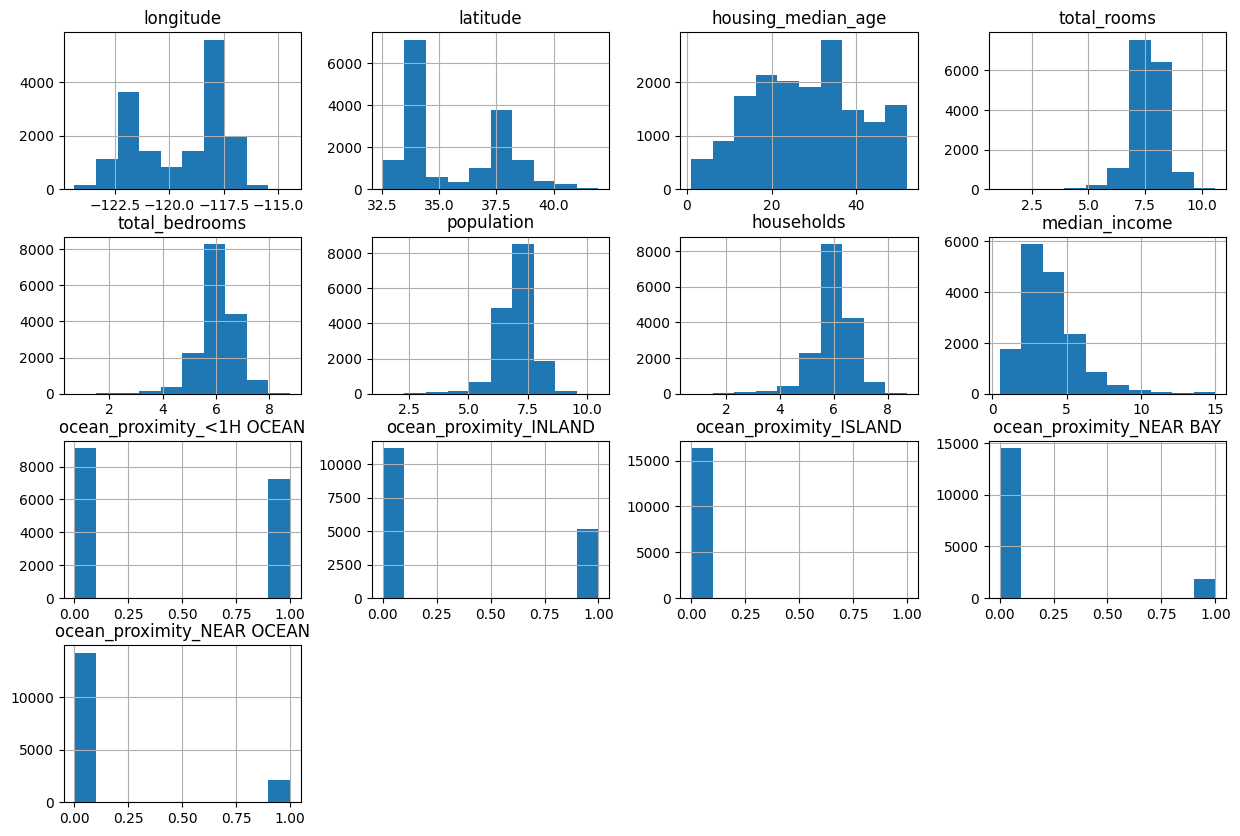

In [ ]:
# Visualize data distributions
plt.figure(figsize=(15, 8))
train_data.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 10))

<Axes: >

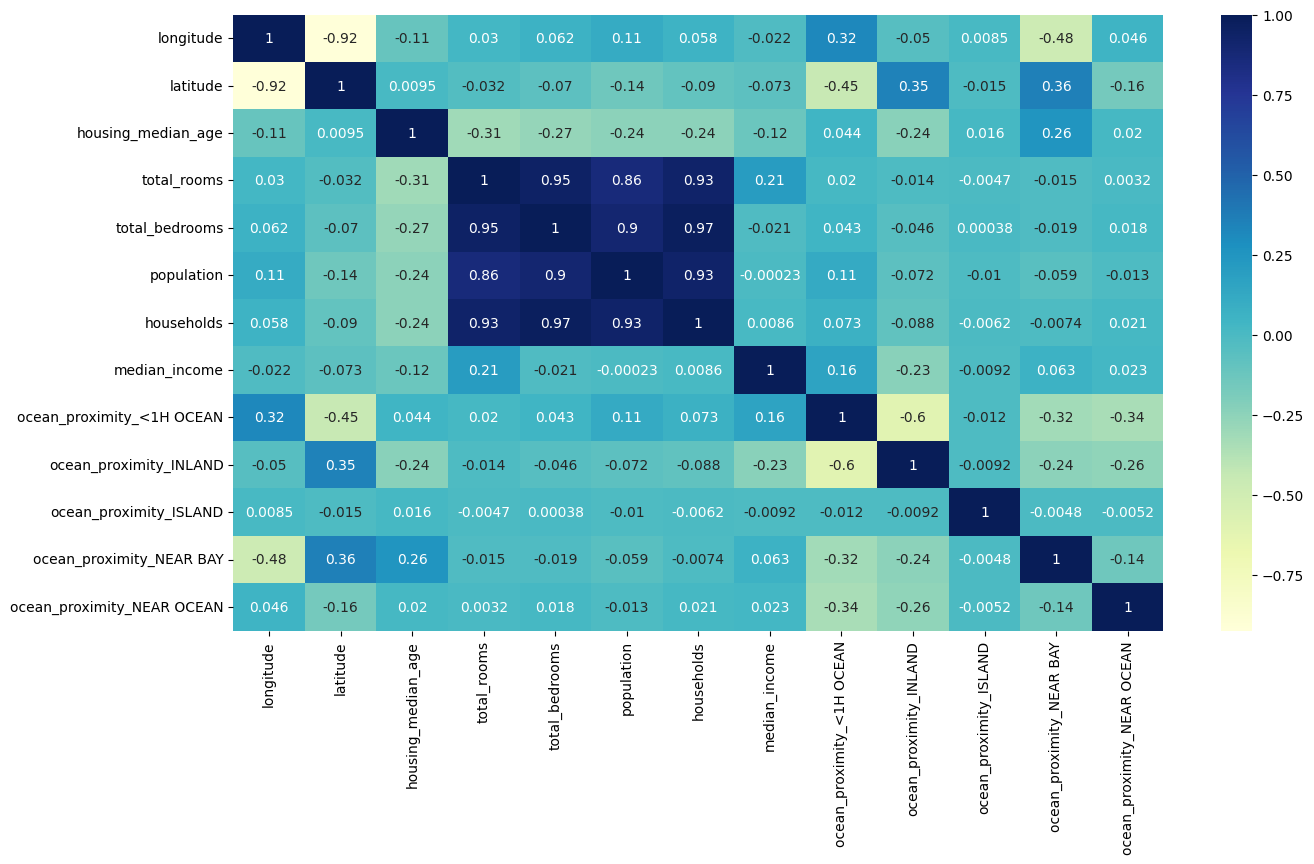

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='YlGnBu')


<Axes: xlabel='longitude', ylabel='latitude'>

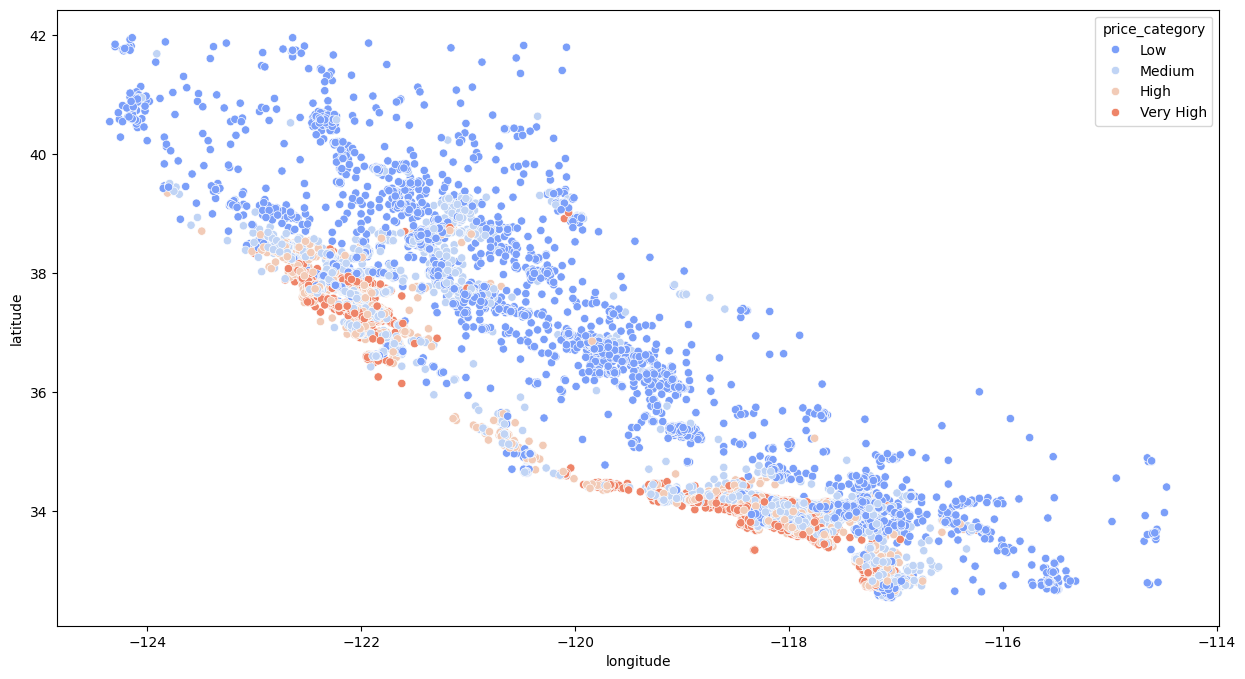

In [ ]:
# Visualization of geographical distribution
plt.figure(figsize=(15, 8))
sns.scatterplot(x='longitude', y='latitude', data=train_data, hue='price_category', palette='coolwarm')


In [ ]:
# Feature engineering - add to both train and test sets
X_train_transformed['bedroom_ratio'] = X_train_transformed['total_bedrooms'] / X_train_transformed['total_rooms']
X_train_transformed['household_rooms'] = X_train_transformed['total_rooms'] / X_train_transformed['households']


In [ ]:
X_test_transformed['bedroom_ratio'] = X_test_transformed['total_bedrooms'] / X_test_transformed['total_rooms']
X_test_transformed['household_rooms'] = X_test_transformed['total_rooms'] / X_test_transformed['households']


In [ ]:
# Update train_data for visualization after feature engineering
train_data['bedroom_ratio'] = X_train_transformed['bedroom_ratio']
train_data['household_rooms'] = X_train_transformed['household_rooms']

In [ ]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,price_category
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,1,0,0,0,0,Medium
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,0,1,0,0,0,Low
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,0,1,0,0,0,Medium
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,1,0,0,0,0,High
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,0,0,0,0,1,Medium


<Axes: >

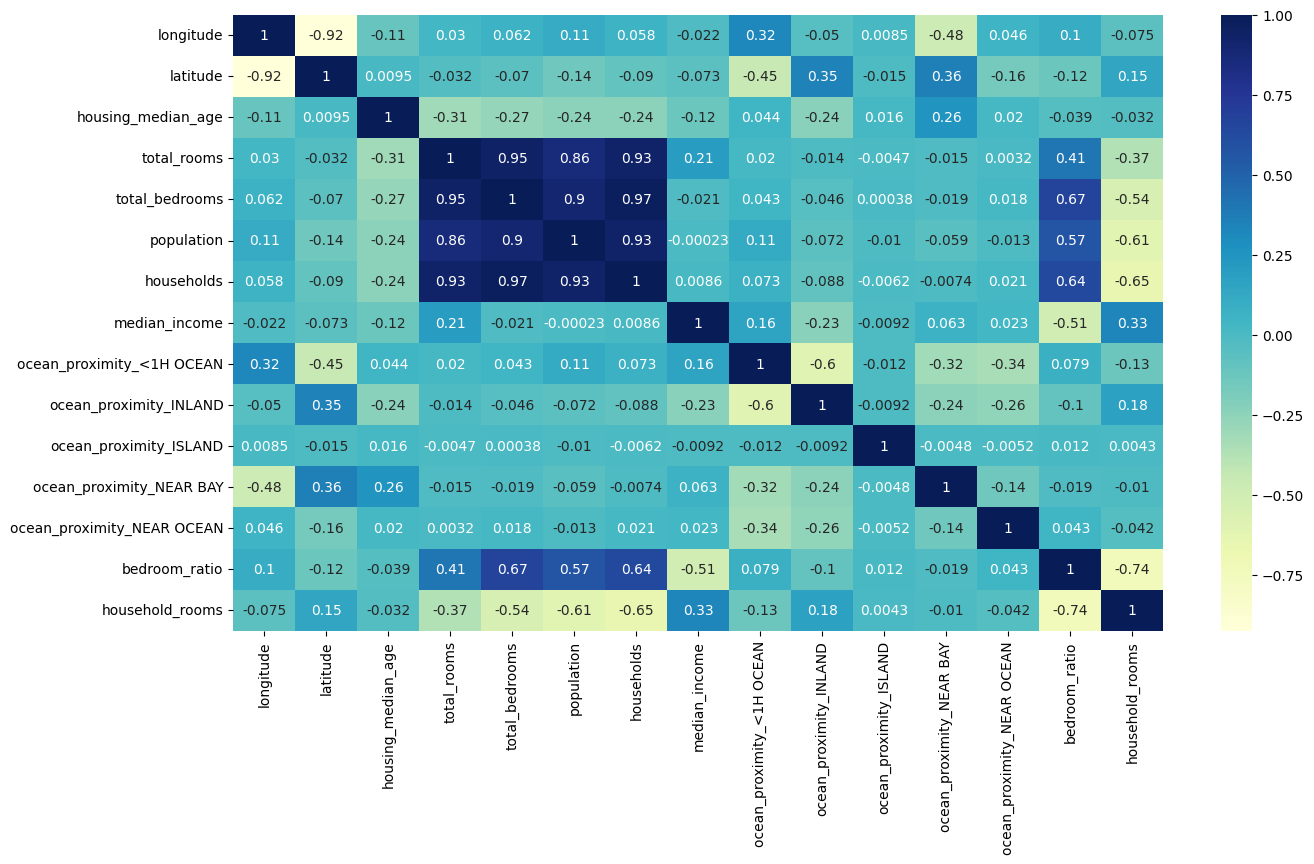

In [ ]:
# Visualize correlations after feature engineering
plt.figure(figsize=(15, 8))
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(train_data[numeric_columns].corr(), annot=True, cmap='YlGnBu')

In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

In [ ]:
X_train_scaled

array([[-1.10651441,  0.78620804, -1.16206244, ..., -0.38540693,
         0.59305221, -0.57941741],
       [-0.02467137,  0.46787317,  0.34865716, ..., -0.38540693,
        -1.16773842,  0.80382169],
       [ 0.75804456, -0.71183841, -0.2874353 , ..., -0.38540693,
         0.64764579, -0.4414751 ],
       ...,
       [ 0.5785683 , -0.76333376,  1.06426118, ..., -0.38540693,
         0.26647416, -0.37952998],
       [-1.22616525,  0.90324292, -1.32108555, ..., -0.38540693,
         0.37127114, -0.49102452],
       [-1.42059787,  0.97814524,  1.85937675, ..., -0.38540693,
         0.39452734, -0.20359331]])

In [ ]:
X_test_scaled

array([[ 1.16685161, -1.33446397, -0.68499309, ...,  2.59466012,
         0.75664602, -0.52541718],
       [-0.85225636,  1.10922431, -2.11620113, ..., -0.38540693,
         0.23608531, -0.05482459],
       [ 0.71816095, -0.80546631,  0.18963404, ..., -0.38540693,
         0.78101314, -0.64805774],
       ...,
       [ 0.27445574, -0.15007099, -1.32108555, ..., -0.38540693,
         0.15523169, -0.22729936],
       [ 1.07711348, -0.73056399, -0.04890063, ..., -0.38540693,
        -0.32375496, -0.14751149],
       [ 1.23664793, -1.43745466, -1.16206244, ...,  2.59466012,
         1.32763481, -0.97936243]])

## Machine Learning Algorithms Employed

- **Algorithms Implemented:**
  - *K-Nearest Neighbors (KNN):* Proximity-based classification.
  - *Naive Bayes (GaussianNB):* Probabilistic model assuming feature independence.
  - *Support Vector Machine (SVM):* Margin-based classification.
  - *Decision Tree:* Rule-based decision-making model.
  - *Random Forest:* Ensemble of decision trees for robust predictions.
- **Optimization:**
  - Hyperparameter tuning applied to Random Forest using GridSearchCV to enhance performance.
- **Why These Algorithms?**
  - Diverse approaches to test accuracy and generalization on the dataset.

In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn

array(['Medium', 'Medium', 'Medium', ..., 'Low', 'Low', 'Medium'],
      dtype=object)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
y_pred_gnb

array(['Medium', 'Low', 'Medium', ..., 'Low', 'Low', 'Medium'],
      dtype='<U9')

In [ ]:
# SVM
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
y_pred_svc

array(['Medium', 'Low', 'Medium', ..., 'Low', 'Low', 'Low'], dtype=object)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_dt

array(['High', 'Low', 'Medium', ..., 'Low', 'Low', 'Low'], dtype=object)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf

array(['Medium', 'Low', 'Medium', ..., 'Low', 'Low', 'Low'], dtype=object)

In [ ]:
# Visualization and evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [ ]:
# Function to evaluate and display results
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n--- {model_name} Results ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

Analyzing Model Performance
- **Evaluation Metrics:**
  - *Accuracy:* Percentage of correct predictions.
  - *Classification Report:* Precision, Recall, and F1-Score for each price category.
  - *Confusion Matrix:* Visualization of true vs. predicted classifications.
- **Key Analyses:**
  - Performance comparison across all models (KNN, Naive Bayes, SVM, Decision Tree, Random Forest).
  - Feature importance extracted from the Random Forest model to identify influential predictors.
- **Insights Gained:**
  - Detailed breakdown of model strengths and weaknesses.
  - Understanding of feature contributions to price predictions.


--- KNN Results ---
Accuracy: 67.63%

Classification Report:
              precision    recall  f1-score   support

        High       0.46      0.48      0.47       630
         Low       0.79      0.82      0.80      1524
      Medium       0.63      0.66      0.65      1396
   Very High       0.77      0.52      0.62       537

    accuracy                           0.68      4087
   macro avg       0.66      0.62      0.64      4087
weighted avg       0.68      0.68      0.68      4087



<Figure size 1000x800 with 0 Axes>

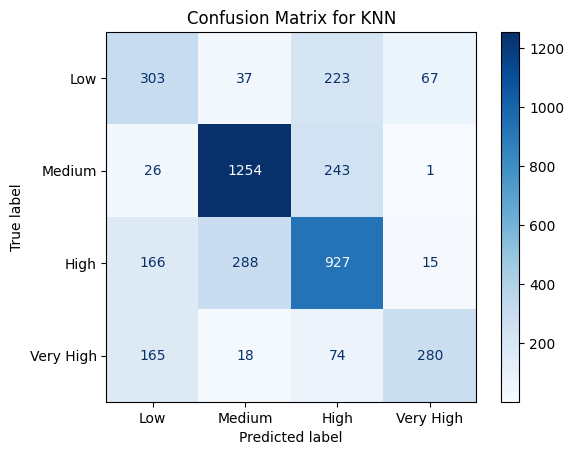


--- Naive Bayes Results ---
Accuracy: 56.45%

Classification Report:
              precision    recall  f1-score   support

        High       0.31      0.53      0.39       630
         Low       0.79      0.70      0.74      1524
      Medium       0.54      0.64      0.59      1396
   Very High       0.82      0.03      0.05       537

    accuracy                           0.56      4087
   macro avg       0.62      0.47      0.44      4087
weighted avg       0.64      0.56      0.54      4087



<Figure size 1000x800 with 0 Axes>

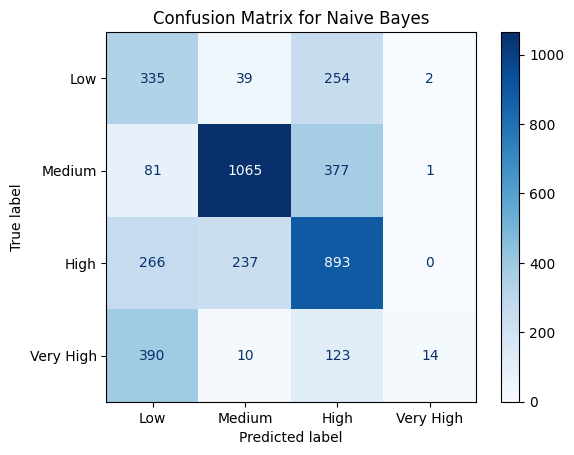


--- SVM Results ---
Accuracy: 70.17%

Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.36      0.43       630
         Low       0.81      0.83      0.82      1524
      Medium       0.62      0.76      0.68      1396
   Very High       0.79      0.61      0.69       537

    accuracy                           0.70      4087
   macro avg       0.69      0.64      0.65      4087
weighted avg       0.70      0.70      0.69      4087



<Figure size 1000x800 with 0 Axes>

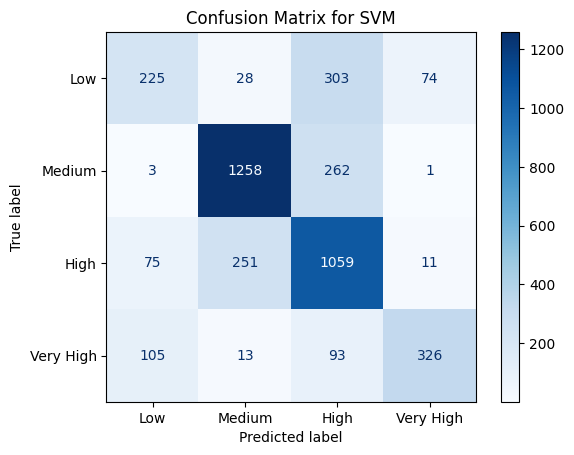


--- Decision Tree Results ---
Accuracy: 69.44%

Classification Report:
              precision    recall  f1-score   support

        High       0.48      0.46      0.47       630
         Low       0.82      0.82      0.82      1524
      Medium       0.67      0.68      0.67      1396
   Very High       0.66      0.64      0.65       537

    accuracy                           0.69      4087
   macro avg       0.66      0.65      0.65      4087
weighted avg       0.69      0.69      0.69      4087



<Figure size 1000x800 with 0 Axes>

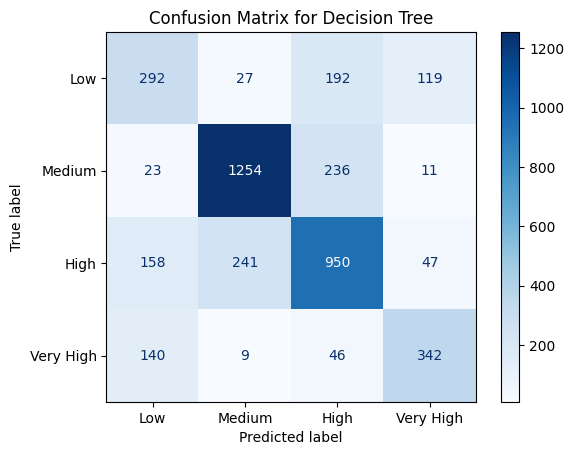


--- Random Forest Results ---
Accuracy: 74.43%

Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.48      0.51       630
         Low       0.85      0.87      0.86      1524
      Medium       0.70      0.77      0.73      1396
   Very High       0.78      0.64      0.71       537

    accuracy                           0.74      4087
   macro avg       0.72      0.69      0.70      4087
weighted avg       0.74      0.74      0.74      4087



<Figure size 1000x800 with 0 Axes>

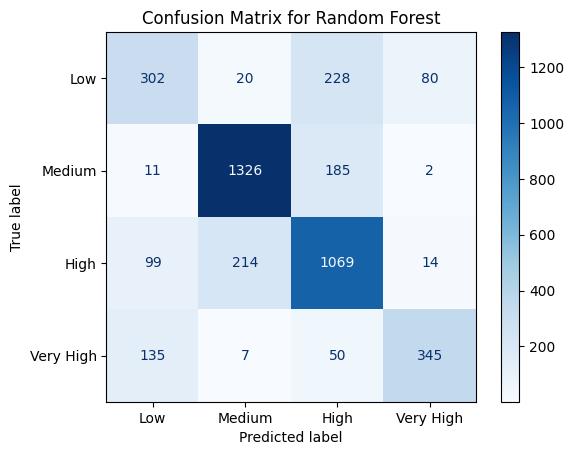

In [ ]:
# Evaluate all models
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("Naive Bayes", y_test, y_pred_gnb)
evaluate_model("SVM", y_test, y_pred_svc)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)


In [ ]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8]
}

In [ ]:
grid_search = GridSearchCV(rf_classifier, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
print("\n--- Hyperparameter Tuning Results ---")
print(f"Best parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)


--- Hyperparameter Tuning Results ---
Best parameters: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 200}



--- Best Random Forest Results ---
Accuracy: 75.75%

Classification Report:
              precision    recall  f1-score   support

        High       0.58      0.47      0.52       630
         Low       0.87      0.87      0.87      1524
      Medium       0.70      0.81      0.75      1396
   Very High       0.79      0.65      0.71       537

    accuracy                           0.76      4087
   macro avg       0.73      0.70      0.71      4087
weighted avg       0.76      0.76      0.75      4087



<Figure size 1000x800 with 0 Axes>

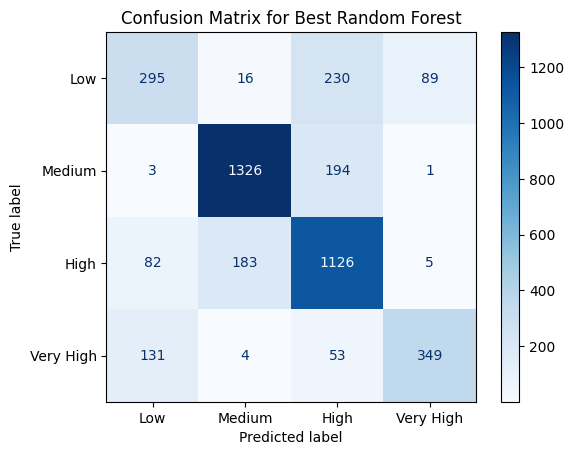

In [ ]:
evaluate_model("Best Random Forest", y_test, y_pred_best_rf)

## Identifying the Optimal Algorithm

- **Winner:** *Random Forest (Post-Hyperparameter Tuning)*
  - Achieved the highest accuracy and balanced performance across metrics.
- **Why Random Forest?**
  - *Robustness:* Handles complex, non-linear relationships effectively.
  - *Tuning Impact:* Optimized parameters (e.g., n_estimators, max_depth) boosted performance.
  - *Feature Insights:* Provides interpretable feature importance scores.
- **Evidence:**
  - Superior accuracy, precision, recall, and F1-scores compared to other models (KNN, SVM, etc.).


In [ ]:
# Feature importance from Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train_transformed.columns,
    'Importance': best_rf.feature_importances_
})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

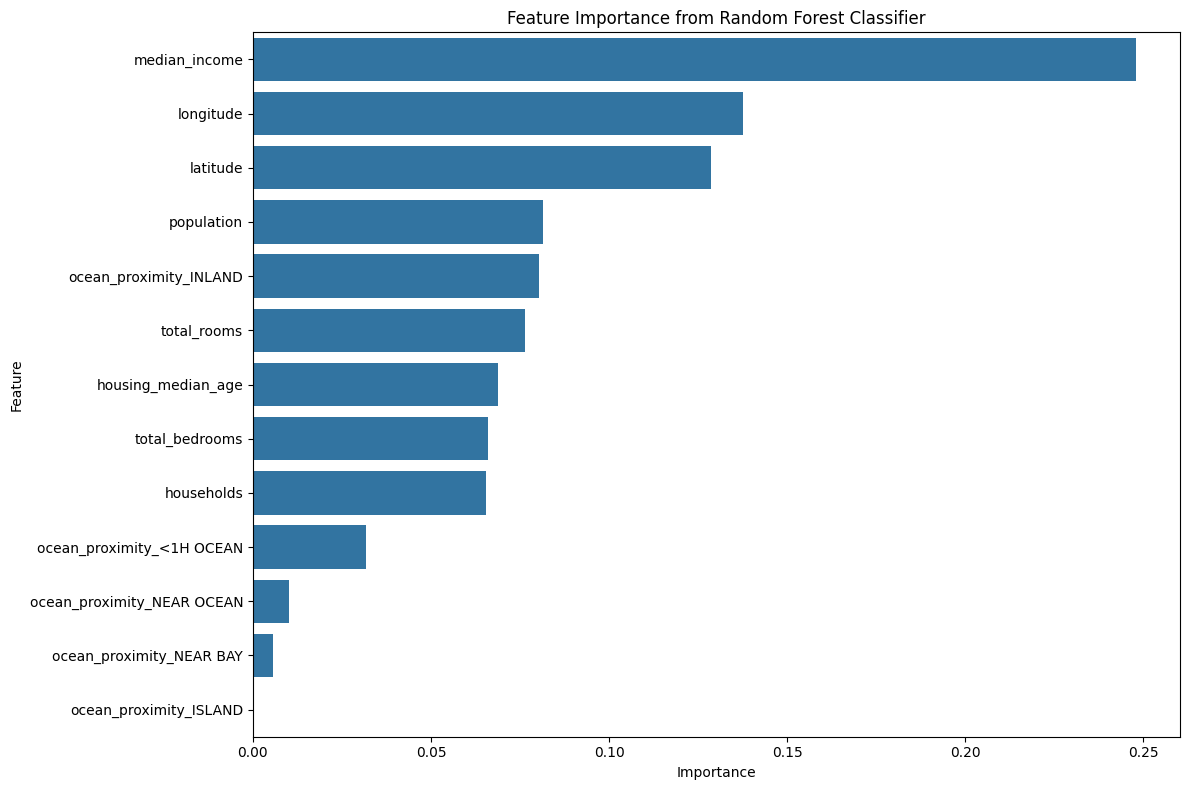

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest Classifier')
plt.tight_layout()
plt.show()

## Conclusion

- **Summary:**
  - Successfully classified California houses into price categories using machine learning.
  - Random Forest, after hyperparameter tuning, emerged as the top-performing algorithm.
- **Achievements:**
  - *Data Preparation:* Handled missing values, encoded categories, and engineered features (e.g., bedroom ratio).
  - *Insights:* Identified key drivers of house prices (e.g., location, size) via feature importance.
- **Implications:**
  - Offers a scalable model for real estate price prediction.
  - Provides actionable insights for housing market stakeholders.